In [1]:
!pip install hmmlearn

In [2]:
from hmmlearn import hmm

In [3]:
!wget -nc https://raw.githubusercontent.com/stefanopiovesan/forex/main/EURUSD1440.csv

File ‘EURUSD1440.csv’ already there; not retrieving.



In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(1)

In [5]:
eurusd = pd.read_csv('EURUSD1440.csv', header=None, parse_dates=True, index_col='Date',names=['Date', 'Time', 'Open',	'High',	'Low',	'Close', 'Volume'])

In [6]:
eurusd.head()

,Time,Open,High,Low,Close,Volume
Date,,,,,,
1971-01-04,00:00,0.5369,0.5369,0.5369,0.5369,1
1971-01-05,00:00,0.5366,0.5366,0.5366,0.5366,1
1971-01-06,00:00,0.5365,0.5365,0.5365,0.5365,1
1971-01-07,00:00,0.5368,0.5368,0.5368,0.5368,1
1971-01-08,00:00,0.5371,0.5371,0.5371,0.5371,1


In [7]:
df = eurusd.loc['2018-01-01':]
df.head()

,Time,Open,High,Low,Close,Volume
Date,,,,,,
2018-01-02,00:00,1.20088,1.20812,1.20007,1.20579,92723
2018-01-03,00:00,1.20579,1.20661,1.20010,1.20142,100564
2018-01-04,00:00,1.20142,1.20889,1.20043,1.20678,109676
2018-01-05,00:00,1.20678,1.20828,1.20206,1.20298,113590
2018-01-08,00:00,1.20268,1.20523,1.19556,1.19669,88881


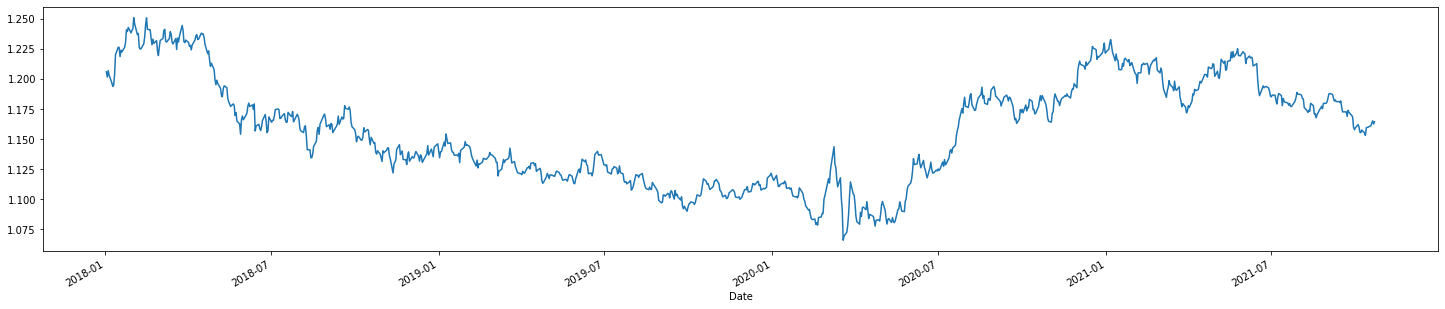

In [8]:
df['Close'].plot(figsize=(25,5))

In [9]:
returns = np.log(df['Close']).diff(5)

In [10]:
returns.dropna(inplace=True)

In [11]:
returns.head(5)

Date
2018-01-09   -0.010127
2018-01-10   -0.005576
2018-01-11   -0.003021
2018-01-12    0.014049
2018-01-15    0.024409
Name: Close, dtype: float64

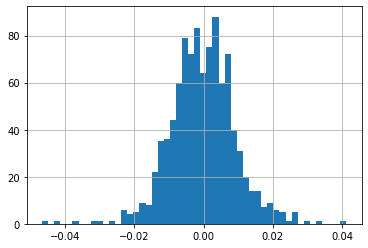

In [12]:
returns.hist(bins=50);

In [13]:
from statsmodels.tsa.stattools import adfuller

def adf(x):
  res = adfuller(x)
  print("Test-Statistic:", res[0])
  print("P-Value:", res[1])
  if res[1] < 0.05:
    print("Stationary")
  else:
    print("Non-Stationary")

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [14]:
adf(returns.dropna())

Test-Statistic: -6.060535024406235
P-Value: 1.2156388156055702e-07
Stationary


In [15]:
model = hmm.GaussianHMM(n_components=2, covariance_type="diag")

In [16]:
X = returns.to_numpy().reshape(-1, 1)
model.fit(X)

GaussianHMM(n_components=2)

In [17]:
X[:5]

array([[-0.01012749],
       [-0.0055756 ],
       [-0.00302085],
       [ 0.01404905],
       [ 0.02440947]])

In [18]:
Z = model.predict(X)

In [19]:
Z[:100]

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

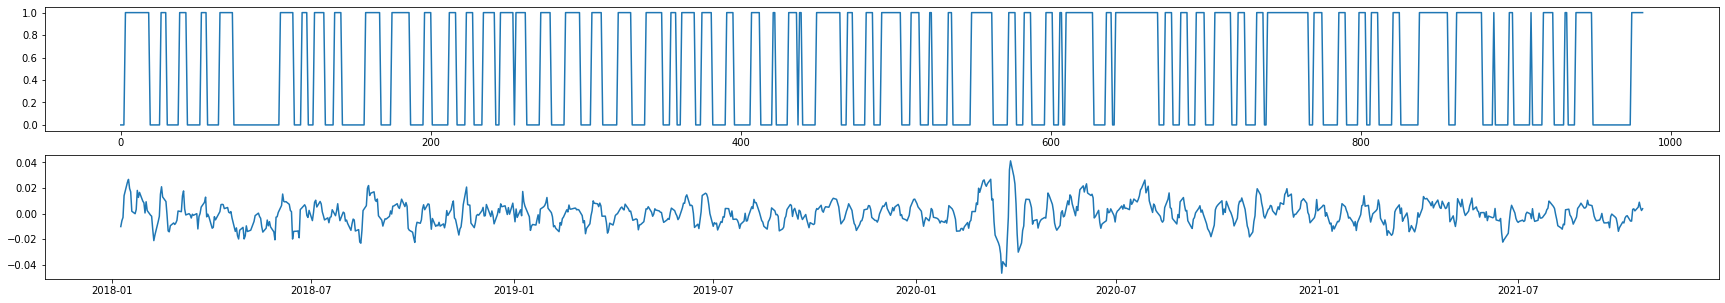

In [20]:
fig, ax = plt.subplots(figsize=(30, 5))
plt.subplot(211)
plt.plot(Z)
plt.subplot(212)
plt.plot(returns);

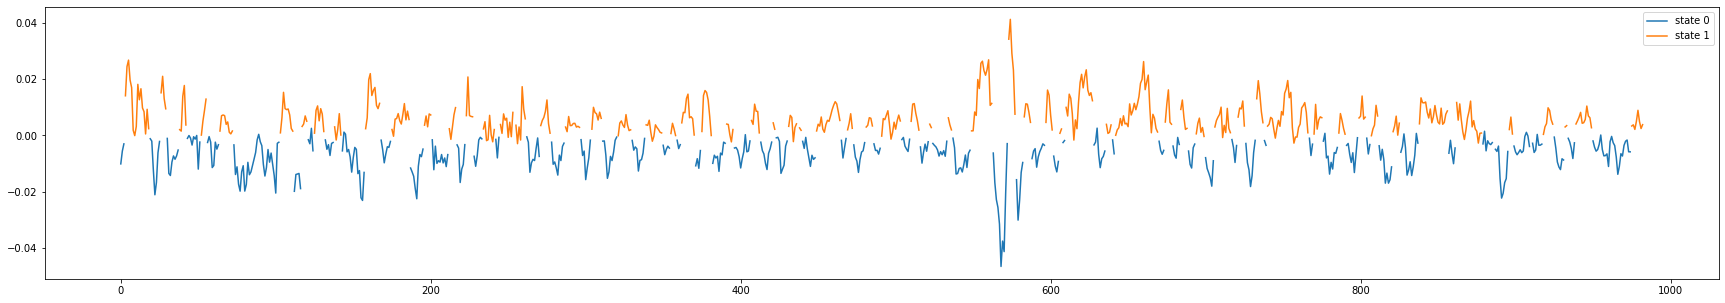

In [21]:
# we want to draw different segments in different colors according to state
fig, ax = plt.subplots(figsize=(30, 5))

# first create arrays with nan
returns0 = np.empty(len(Z))
returns1 = np.empty(len(Z))
returns0[:] = np.nan
returns1[:] = np.nan

# fill in the values only if the state is the one corresponding to the array
returns0[Z == 0] = returns[Z == 0]
returns1[Z == 1] = returns[Z == 1]
plt.plot(returns0[0:], label='state 0')
plt.plot(returns1[0:], label='state 1')
plt.legend();

In [22]:
# transition matrix
model.transmat_

array([[0.50329329, 0.49670671],
       [0.49724331, 0.50275669]])

In [23]:
# try to set the transition matrix intuitively
model.transmat_ = np.array([
  [0.75, 0.25],
  [0.25, 0.75],                           
])

In [24]:
# run inference again
Z = model.predict(X)

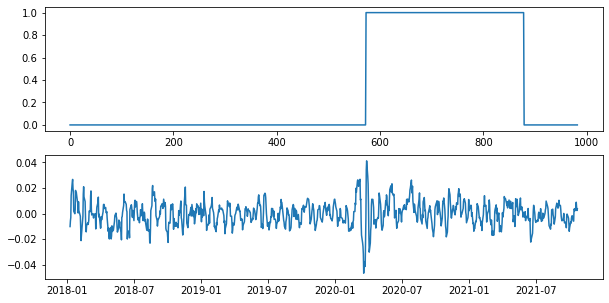

In [25]:
fig, ax = plt.subplots(figsize=(10, 5))
plt.subplot(211)
plt.plot(Z)
plt.subplot(212)
plt.plot(returns);

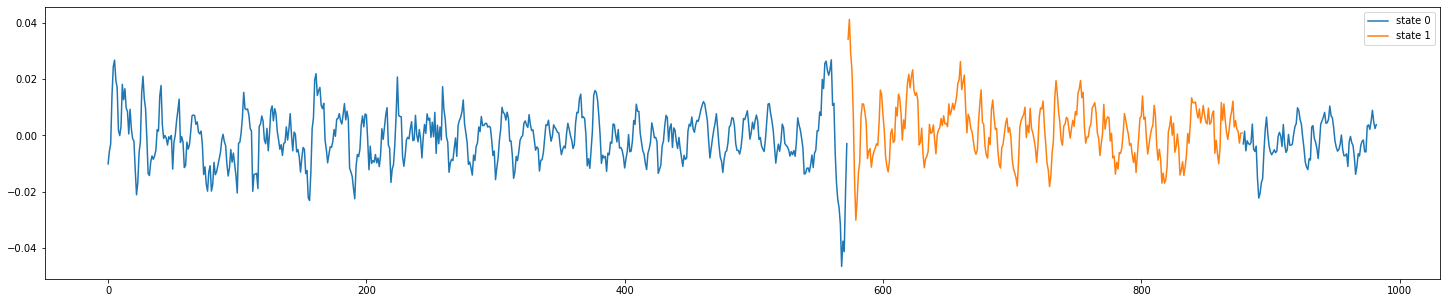

In [26]:
# we want to draw different segments in different colors according to state
fig, ax = plt.subplots(figsize=(25, 5))

# first create arrays with nan
returns0 = np.empty(len(Z))
returns1 = np.empty(len(Z))
returns0[:] = np.nan
returns1[:] = np.nan

# fill in the values only if the state is the one corresponding to the array
returns0[Z == 0] = returns[Z == 0]
returns1[Z == 1] = returns[Z == 1]
plt.plot(returns0, label='state 0')
plt.plot(returns1, label='state 1')
plt.legend();

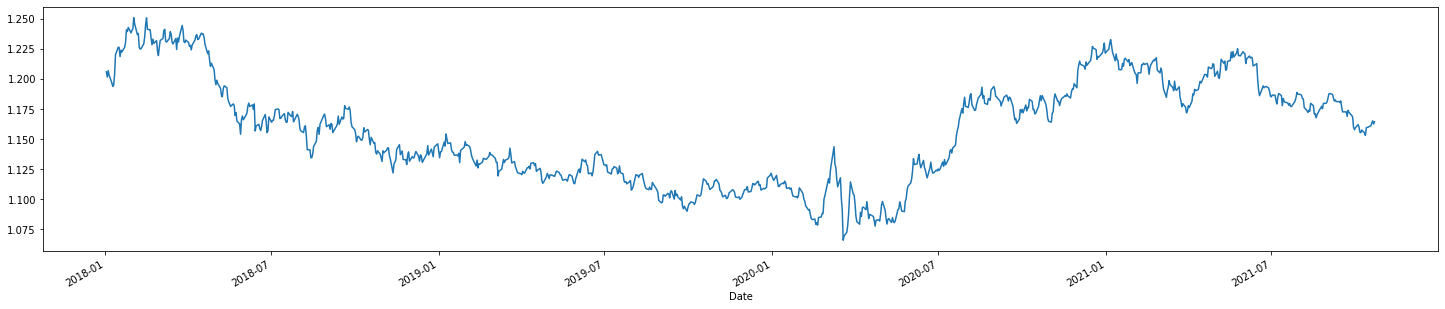

In [27]:
df['Close'].plot(figsize=(25,5))

In [28]:
returns_n = pd.DataFrame()
for n in range(3,10,3):
  returns_n[str(n)] = np.log(df['Close']).diff(n)

In [29]:
returns_n.head()

,3,6,9
Date,,,
2018-01-02,NaN,NaN,NaN
2018-01-03,NaN,NaN,NaN
2018-01-04,NaN,NaN,NaN
2018-01-05,-0.002333,NaN,NaN
2018-01-08,-0.003945,NaN,NaN


In [30]:
returns_n.dropna(inplace=True)

In [31]:
model_n = hmm.GaussianHMM(n_components=2, covariance_type="diag")

In [32]:
X_n = returns_n.to_numpy().reshape(-1, 3)
X_n

array([[ 0.0260403 ,  0.01916708,  0.01683393],
       [ 0.01878125,  0.02415664,  0.02021186],
       [-0.00128771,  0.02055568,  0.00960749],
       ...,
       [ 0.00450781,  0.01044013,  0.00842992],
       [ 0.00123097,  0.0025842 ,  0.00434528],
       [ 0.00084211,  0.00399343,  0.00781241]])

In [33]:
model_n.fit(X_n)

GaussianHMM(n_components=2)

In [34]:
Z_n = model_n.predict(X_n)

In [35]:
# transition matrix
model_n.transmat_

array([[0.90984382, 0.09015618],
       [0.10232175, 0.89767825]])

In [36]:
# try to set the transition matrix intuitively
model_n.transmat_ = np.array([
  [0.75, 0.25],
  [0.25, 0.75],                           
])

In [37]:
Z_n = model_n.predict(X_n)

In [38]:
Z_n.shape, returns_n['6'].shape

((979,), (979,))

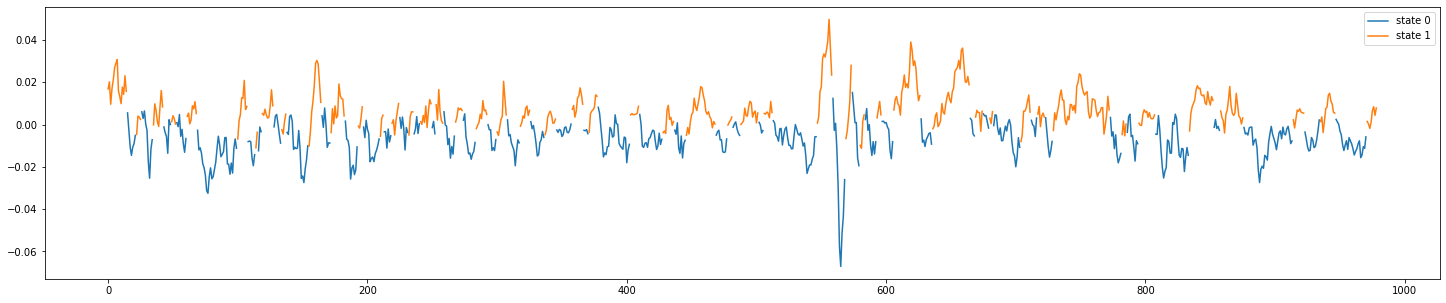

In [39]:
# we want to draw different segments in different colors according to state
fig, ax = plt.subplots(figsize=(25, 5))

# first create arrays with nan
returns0 = np.empty(len(Z_n))
returns1 = np.empty(len(Z_n))
returns0[:] = np.nan
returns1[:] = np.nan

returns_i = returns_n['9']

# fill in the values only if the state is the one corresponding to the array
returns0[Z_n == 0] = returns_i[Z_n == 0]
returns1[Z_n == 1] = returns_i[Z_n == 1]
plt.plot(returns0[:], label='state 0')
plt.plot(returns1[:], label='state 1')
plt.legend();

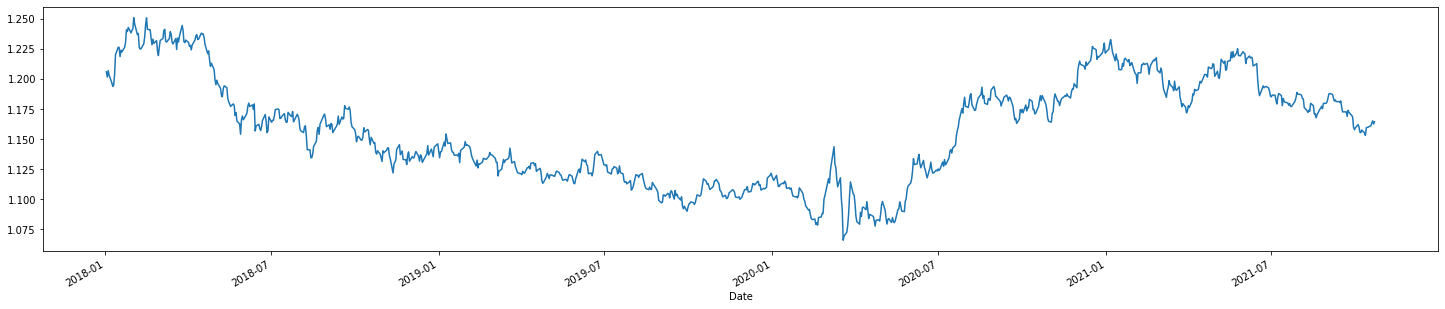

In [40]:
df['Close'].plot(figsize=(25,5))